## 과제2  Daum 연관 검색어 수집, 저장, 시각화


In [54]:
import requests
import numpy as np
import pandas as pd
import time
import re
import selenium
from selenium import webdriver as wd
from selenium.webdriver import Chrome

div = wd.Chrome('C:/Users/goeun/Desktop/Eunbi Go/BOAZ/BOAZ 시각화 13기 BASE/chromedriver.exe')

In [55]:
div.get('http://www.daum.net')
time.sleep(3)

In [56]:
div.find_element_by_xpath('//*[@id="q"]').send_keys('피부과')
div.find_element_by_xpath('//*[@id="daumSearch"]/fieldset/div/div/button[2]').click()

In [57]:
# 다음 연관 검색어는 두 종류로 분류 되어 존재한다. '제안'과 '관련'
# '제안' 연관 검색어
xpath = []
for i in range(1,16):
    xpath.append('//*[@id="recomm_lists_top"]/span[' +str(i)+ ']/a')
xpath

['//*[@id="recomm_lists_top"]/span[1]/a',
 '//*[@id="recomm_lists_top"]/span[2]/a',
 '//*[@id="recomm_lists_top"]/span[3]/a',
 '//*[@id="recomm_lists_top"]/span[4]/a',
 '//*[@id="recomm_lists_top"]/span[5]/a',
 '//*[@id="recomm_lists_top"]/span[6]/a',
 '//*[@id="recomm_lists_top"]/span[7]/a',
 '//*[@id="recomm_lists_top"]/span[8]/a',
 '//*[@id="recomm_lists_top"]/span[9]/a',
 '//*[@id="recomm_lists_top"]/span[10]/a',
 '//*[@id="recomm_lists_top"]/span[11]/a',
 '//*[@id="recomm_lists_top"]/span[12]/a',
 '//*[@id="recomm_lists_top"]/span[13]/a',
 '//*[@id="recomm_lists_top"]/span[14]/a',
 '//*[@id="recomm_lists_top"]/span[15]/a']

In [58]:
# '관련' 연관 검색어
xpath2 = []
for i in range(1,16):
    xpath2.append('//*[@id="netizen_lists_top"]/span[' +str(i)+ ']/a')
xpath2

['//*[@id="netizen_lists_top"]/span[1]/a',
 '//*[@id="netizen_lists_top"]/span[2]/a',
 '//*[@id="netizen_lists_top"]/span[3]/a',
 '//*[@id="netizen_lists_top"]/span[4]/a',
 '//*[@id="netizen_lists_top"]/span[5]/a',
 '//*[@id="netizen_lists_top"]/span[6]/a',
 '//*[@id="netizen_lists_top"]/span[7]/a',
 '//*[@id="netizen_lists_top"]/span[8]/a',
 '//*[@id="netizen_lists_top"]/span[9]/a',
 '//*[@id="netizen_lists_top"]/span[10]/a',
 '//*[@id="netizen_lists_top"]/span[11]/a',
 '//*[@id="netizen_lists_top"]/span[12]/a',
 '//*[@id="netizen_lists_top"]/span[13]/a',
 '//*[@id="netizen_lists_top"]/span[14]/a',
 '//*[@id="netizen_lists_top"]/span[15]/a']

In [59]:
# 피부과 검색 시 나오는 연관검색어 수집
search = []
div.find_element_by_xpath('//*[@id="netizen_more_btn_top"]').click()
time.sleep(2)
for i in range(len(xpath)):
    search.append(div.find_element_by_xpath(xpath[i]).text)
search

['대구 피부과',
 '강남 피부과',
 '여드름 피부과',
 '피부과 전문의',
 '중랑구 피부과',
 '피부과 병원',
 '가산동 피부과',
 '마산 피부과',
 '광주 피부과',
 '피부과 잘하는곳',
 '울산 피부과',
 '춘천 피부과',
 '여의도 피부과',
 '구로동 피부과',
 '피부가려움증의 원인']

In [61]:
link = pd.DataFrame({'source':[],'target':[]})
link

,source,target


In [63]:

for i in range(len(search)):    
    
    target = []
    div.find_element_by_xpath('//*[@id="q"]').clear()
    div.find_element_by_xpath('//*[@id="q"]').send_keys(search[i])
    div.find_element_by_xpath('//*[@id="daumBtnSearch"]').click()
    time.sleep(3)
    try:
        div.find_element_by_xpath('//*[@id="recomm_lists_top"]/h2').text
        try:
            div.find_element_by_xpath('//*[@id="netizen_more_btn_top"]').click()
        except :
            next
        time.sleep(1)
        
        for j in range(len(xpath)):
            try :
                target.append(div.find_element_by_xpath(xpath[j]).text)
            except :
                break
        link2 = pd.DataFrame({'source':search[i],'target':target})
    except:
        
        try :
            div.find_element_by_xpath('//*[@id="netizen_more_btn_top"]').click()
        except:
            next
        time.sleep(1)
        
        for j in range(len(xpath2)):
            try :
                target.append(div.find_element_by_xpath(xpath2[j]).text)
            except :
                break
        link2 = pd.DataFrame({'source':search[i],'target':target})
    link = pd.concat([link,link2])
link

,source,target
0,대구 피부과,대구 피부과 추천
1,대구 피부과,대구 성형외과
2,대구 피부과,대구 피부과 유명한곳
3,대구 피부과,부산 피부과
4,대구 피부과,수성구 피부과
5,대구 피부과,대구 수성구 피부과
6,대구 피부과,대구 피부과 잘하는곳
7,대구 피부과,대구 동성로 피부과
8,대구 피부과,대구 중구 피부과
9,대구 피부과,대구 로제피부과


In [69]:
link.to_csv('daum 연관 검색어.csv',index=False,encoding='cp949')

In [ ]:
%matplotlib inline

In [141]:
import networkx as nx
G = nx.Graph()

In [142]:
edges=[('apple','banana'),('apple','mango'),('apple','kiwi')]
G.add_edges_from(edges)

In [143]:
G.edges()

EdgeView([('apple', 'banana'), ('apple', 'mango'), ('apple', 'kiwi')])

In [144]:
G.degree()

DegreeView({'apple': 3, 'banana': 1, 'mango': 1, 'kiwi': 1})

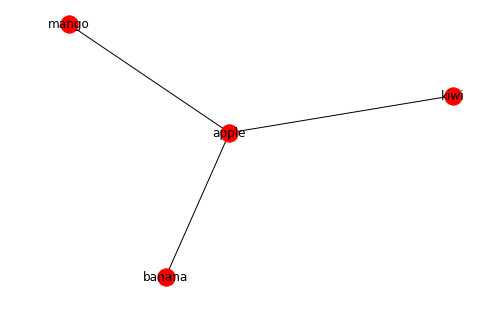

In [128]:
nx.draw(G,with_labels=True)

In [146]:
G = nx.Graph()

edges=[]
for i in range(len(link)):
    edges.append((str(link.iloc[i,0]),str(link.iloc[i,1])))

G.add_edges_from(edges)

In [147]:
G.edges()

EdgeView([('대구 피부과', '대구 피부과 추천'), ('대구 피부과', '대구 성형외과'), ('대구 피부과', '대구 피부과 유명한곳'), ('대구 피부과', '부산 피부과'), ('대구 피부과', '수성구 피부과'), ('대구 피부과', '대구 수성구 피부과'), ('대구 피부과', '대구 피부과 잘하는곳'), ('대구 피부과', '대구 동성로 피부과'), ('대구 피부과', '대구 중구 피부과'), ('대구 피부과', '대구 로제피부과'), ('대구 피부과', '대구 여드름'), ('대구 피부과', '달서구 피부과'), ('대구 피부과', '대구 동구 피부과'), ('대구 피부과', '대구 사마귀 피부과'), ('대구 피부과', '대구 달서구 피부과'), ('강남 피부과', '강남 성형외과'), ('강남 피부과', '강남역 피부과'), ('강남 피부과', '분당 피부과'), ('강남 피부과', '압구정 피부과'), ('강남 피부과', '강남 피부과 추천'), ('강남 피부과', '신사동 피부과'), ('강남 피부과', '건대 피부과'), ('강남 피부과', '메이퓨어'), ('강남 피부과', '쁨클리닉'), ('강남 피부과', '역삼역 피부과'), ('강남 피부과', '남양주 피부과'), ('강남 피부과', '강남 피부과 의원'), ('강남 피부과', '아름다운 피부과'), ('강남 피부과', '이지함 피부과'), ('강남 피부과', '강남여드름'), ('강남여드름', '여드름 피부과'), ('여드름 피부과', '임이석테마피부과'), ('여드름 피부과', '여드름 흉터 레이저'), ('여드름 피부과', '좁쌀여드름 없애는법'), ('여드름 피부과', '지루성 피부염'), ('여드름 피부과', '청소년 여드름 피부과'), ('여드름 피부과', '화농성 여드름'), ('여드름 피부과', '여드름 치료'), ('여드름 피부과', '과다 피지분비 치료법'), ('여드름 피부과', '기미'), ('여드름 피부과', '여드름 피부과 한의원'), ('여드름

In [148]:
G.degree()

DegreeView({'대구 피부과': 15, '대구 피부과 추천': 1, '대구 성형외과': 1, '대구 피부과 유명한곳': 1, '부산 피부과': 1, '수성구 피부과': 1, '대구 수성구 피부과': 1, '대구 피부과 잘하는곳': 1, '대구 동성로 피부과': 1, '대구 중구 피부과': 1, '대구 로제피부과': 1, '대구 여드름': 1, '달서구 피부과': 1, '대구 동구 피부과': 1, '대구 사마귀 피부과': 1, '대구 달서구 피부과': 1, '강남 피부과': 15, '강남 성형외과': 1, '강남역 피부과': 1, '분당 피부과': 1, '압구정 피부과': 1, '강남 피부과 추천': 1, '신사동 피부과': 1, '건대 피부과': 1, '메이퓨어': 1, '쁨클리닉': 1, '역삼역 피부과': 1, '남양주 피부과': 1, '강남 피부과 의원': 1, '아름다운 피부과': 1, '이지함 피부과': 1, '강남여드름': 2, '여드름 피부과': 13, '임이석테마피부과': 1, '여드름 흉터 레이저': 1, '좁쌀여드름 없애는법': 1, '지루성 피부염': 1, '청소년 여드름 피부과': 1, '화농성 여드름': 1, '여드름 치료': 1, '과다 피지분비 치료법': 1, '기미': 1, '여드름 피부과 한의원': 1, '피부 가려움증': 1, '여드름 약': 1, '피부과 전문의': 15, '클린업 피부과': 1, '창원 피부과 전문의': 1, '피부과 전문의 검색': 1, '강남 피부과 전문의': 1, '피부과 명의': 1, '부산 피부과 전문의': 1, '대한피부과 의사회': 1, '피부과 의원': 2, '인천 피부과 전문의': 1, '대구 피부과 전문의': 1, '연산동 피부과 전문의': 1, '피부과 전문의 연봉': 1, '계피부과': 1, '대전 피부과 전문의': 1, '일산 피부과 전문의': 1, '중랑구 피부과': 5, '중랑구 맑은 피부과': 1, '중랑구 피부과 추천': 1, '중화동 피부과': 1, '사가정 참고운피부과

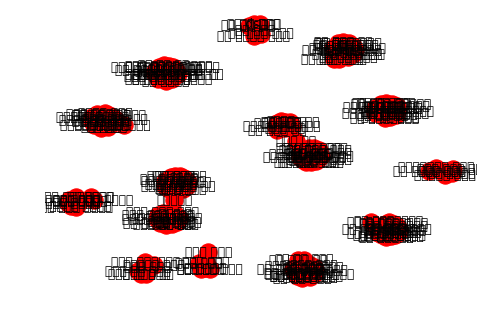

In [150]:
nx.draw(G,with_labels=True)

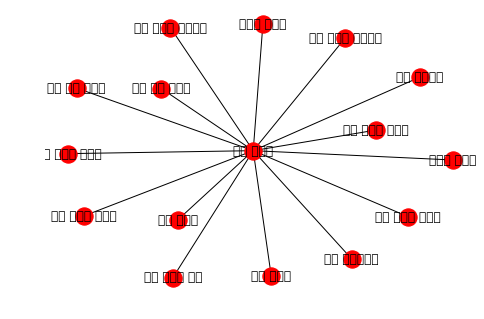

In [153]:
G = nx.Graph()
e = edges[0:15]
G.add_edges_from(e)
G.edges()
nx.draw(G,with_labels=True)  # 한글 깨짐...